<a href="https://colab.research.google.com/github/junawaneshivani/Pytorch/blob/master/nb5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Netoworks
Neural networks can be constructed using the torch.nn package.

A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule: `weight = weight - learning_rate * gradient`


Reference - https://www.youtube.com/watch?v=oPhxf2fXHkQ&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=13

In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#print(device)

cuda


In [25]:
# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
batch_size = 100
learning_rate = 0.001
EPOCHS = 4

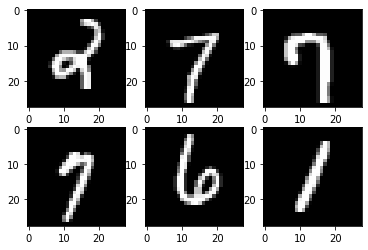

In [26]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)
test_dataset  = torchvision.datasets.MNIST(root="./data", train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

examples = iter(train_loader)
first_batch_data, first_batch_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(first_batch_data[i][0], cmap='gray')
plt.show()

In [27]:
# Fully connected neural network with one hidden layer
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = F.relu(self.l1(x))
        out = self.l2(out)
        # no activation and no softmax at the end as we are using CEL
        return out

model = NeuralNetwork(input_size, hidden_size, num_classes).to(device)

In [28]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [31]:
# Train the model
for epoch in range(EPOCHS):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        y_predicted = model(images)
        loss = criterion(y_predicted, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{EPOCHS}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')        

Epoch [1/4], Step [100/600], Loss: 0.0228
Epoch [1/4], Step [200/600], Loss: 0.0423
Epoch [1/4], Step [300/600], Loss: 0.0112
Epoch [1/4], Step [400/600], Loss: 0.0712
Epoch [1/4], Step [500/600], Loss: 0.0453
Epoch [1/4], Step [600/600], Loss: 0.0205
Epoch [2/4], Step [100/600], Loss: 0.0195
Epoch [2/4], Step [200/600], Loss: 0.0066
Epoch [2/4], Step [300/600], Loss: 0.0329
Epoch [2/4], Step [400/600], Loss: 0.0252
Epoch [2/4], Step [500/600], Loss: 0.0546
Epoch [2/4], Step [600/600], Loss: 0.0679
Epoch [3/4], Step [100/600], Loss: 0.0118
Epoch [3/4], Step [200/600], Loss: 0.0643
Epoch [3/4], Step [300/600], Loss: 0.0259
Epoch [3/4], Step [400/600], Loss: 0.0402
Epoch [3/4], Step [500/600], Loss: 0.0106
Epoch [3/4], Step [600/600], Loss: 0.0098
Epoch [4/4], Step [100/600], Loss: 0.0087
Epoch [4/4], Step [200/600], Loss: 0.0064
Epoch [4/4], Step [300/600], Loss: 0.0110
Epoch [4/4], Step [400/600], Loss: 0.0052
Epoch [4/4], Step [500/600], Loss: 0.0193
Epoch [4/4], Step [600/600], Loss:

In [32]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 97.96 %
